In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
 

In [160]:
A=25
tau_a = 43.2
tau_e = 61.3
f = .01
k=1/20 #can try 1/5, 1/2, etc.
g=.35 #check on this one
B0 = 20
t_span = np.arange(1, 481) #because we know the initial condition, so we can go from there. 



In [161]:
#defining function for drug concentration
def drug_concentration(t, B):
    result = A*(1-0.5**(t/tau_a)) * 0.5**(t/tau_e) - f * B
    if result < 0: 
        result = 0
    return result


In [162]:
#defining function for bacteria concentration
def bac_concentration(t, D):
    result = B0*(2**(k*t) - g*D)
    if result < 0: 
        result = 0
    if result > 100: 
        result = 100
    return result



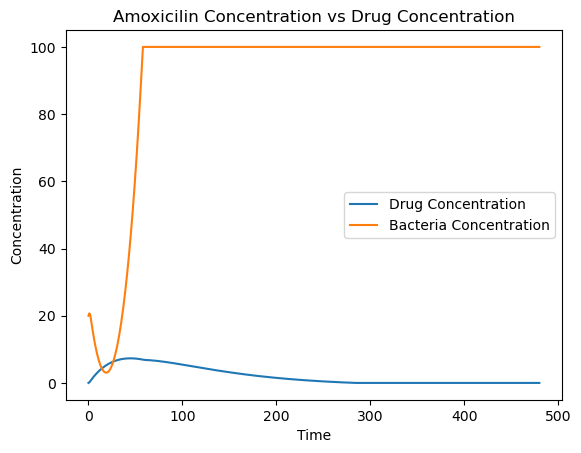

In [163]:
#use the model to plot the results of a single dose: 
D=np.zeros(481)
B=np.zeros(481)
D[0]=0
B[0]=B0

for t in t_span: 
    D[t] = drug_concentration(t, B[t-1])
    B[t] = bac_concentration(t, D[t-1])

t_span_full = np.arange(0, 481)
plt.figure()
plt.plot(t_span_full, D, label='Drug Concentration')
plt.plot(t_span_full, B, label='Bacteria Concentration')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Amoxicilin Concentration vs Drug Concentration')
plt.legend()
plt.show()

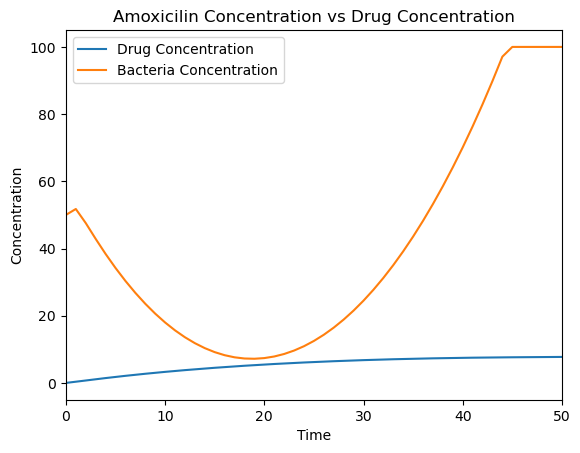

In [159]:
#zoom in to the beginning section
plt.figure()
plt.plot(t_span_full, D, label='Drug Concentration')
plt.plot(t_span_full, B, label='Bacteria Concentration')
plt.xlim(0, 50)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Amoxicilin Concentration vs Drug Concentration')
plt.legend()
plt.show() 

In [49]:
#definite initial conditions & parameters
dose = 250 #in mg, initial concentration of drug given to patients
k = 2
g = 1/10000
placeholder = 5
B0 = 1000 #come back for the units

y0 = [dose, B0]


In [55]:
#defining the differential equation
def der_inf(t, y):
    D = y[0]
    B = y[1]

    dDdt = D - g * B * D #how did you derive this? Can python give us differential plots automatically? 
    dBdt = B - g*D*B

    return [dDdt, dBdt]




In [60]:
#Solve the system of ODEs
t_span = (0,14)
t_eval = np.linspace(t_span[0],t_span[1],1000)
soln_inf = solve_ivp(fun = der_inf, t_span=t_span, y0 = y0,t_eval=t_eval)

In [61]:
print(soln_inf)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.401e-02 ...  1.399e+01  1.400e+01]
        y: [[ 2.500e+02  2.532e+02 ...  2.071e-07  1.208e-06]
            [ 1.000e+03  1.014e+03 ...  8.893e+08  9.019e+08]]
      sol: None
 t_events: None
 y_events: None
     nfev: 190562
     njev: 0
      nlu: 0


<function matplotlib.pyplot.show(close=None, block=None)>

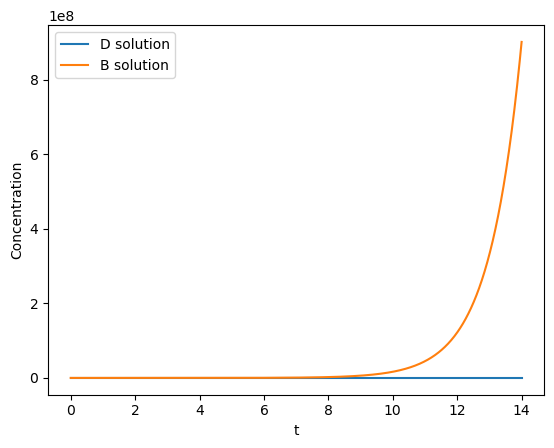

In [62]:
#make plots
plt.plot(soln_inf.t, soln_inf.y[0], label='D solution')

plt.plot(soln_inf.t, soln_inf.y[1], label='B solution')

plt.legend()
plt.xlabel('t')
plt.ylabel('Concentration')
plt.show